In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import matplotlib.patches as patches
from salishsea_tools import viz_tools, geo_tools, tidetools
from bathy_helpers import *

In [2]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

## 2694 particles were released at various depthts at time=0 in the following domain marked by the black rectangle.

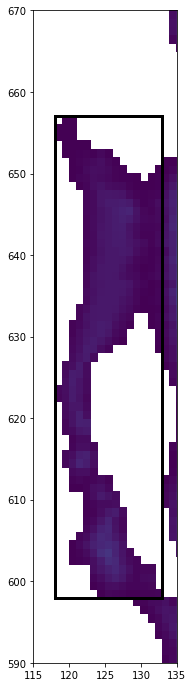

In [70]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
ax.pcolormesh(grid.variables['Bathymetry'][:])
ax.set_ylim(590,670)
ax.set_xlim(115,135)
viz_tools.set_aspect(ax)
ax.add_patch(patches.Rectangle((118,598), 15, 59, fill=False, linewidth=3))

In [3]:
result = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/monthlong/ariane_trajectories_qualitative.nc')
latt = result.variables['traj_lat']
lont = result.variables['traj_lon']
bathy, lons, lats = tidetools.get_bathy_data(grid)

In [12]:
sample_index=[4,7,8]
time0 = latt[0,:]
for l in range(time):
    deep_latt = [latt[l,m] for m in sample_index]
    deep_lont = [lont[l,m] for m in sample_index]
    pts = np.array([deep_lont,deep_latt]).T
    test = poly.contains_points(pts)
    number_of_deep_particles[l]= sum(test) / length_of_deep_particles

[49.530588150024414, 49.530588150024414, 49.530588150024414]
[49.532856563657987, 49.531638623788915, 49.530687912675347]


In [13]:
mask = lont[:].mask
def still_inside(time, number):
    number_of_particles = np.zeros(time)
    for n in range(time):
        for m in range(number):
            if (mask[n,m]) == False:
                y,x = geo_tools.find_closest_model_point(lont[n,m],latt[n,m],lons, lats, land_mask=bathy.mask)
                if (598<y<658) and (118<x<134):
                    number_of_particles[n] = number_of_particles[n] + 1
    return number_of_particles

In [17]:
b = still_inside(744,2694)

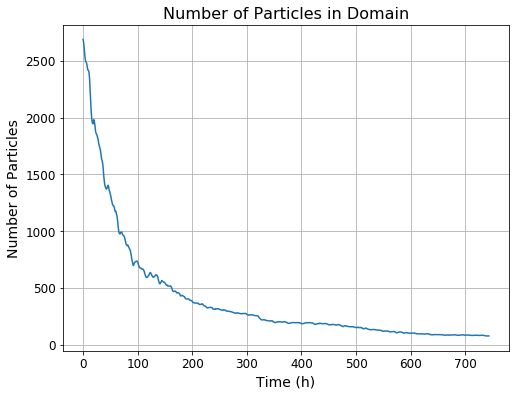

In [18]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
time = range(744)
ax.plot(time, b)
ax.grid('on')
ax.set_title('Number of Particles in Domain', fontsize=16)
ax.set_ylabel('Number of Particles', fontsize=14)
ax.set_xlabel('Time (h)', fontsize=14)
ax.tick_params(labelsize=12)

In [45]:
index_deep_particles=[]
d = result.variables['init_z']
for n in range(2694):
    if d[n] > 6:
        index_deep_particles.append(n)

In [47]:
len(index_deep_particles)

1689

In [56]:
mask = lont[:].mask
def deep_particles(time, index):
    number_of_deep_particles = np.zeros(time)
    for n in range(time):
        for m in index:
            if (mask[n,m]) == False: 
                y,x = geo_tools.find_closest_model_point(lont[n,m],latt[n,m],lons, lats, land_mask=bathy.mask)
                if (598<y<658) and (118<x<134):
                    number_of_deep_particles[n] = number_of_deep_particles[n] + 1
    return number_of_deep_particles

In [57]:
sa = deep_particles(744,index_deep_particles)

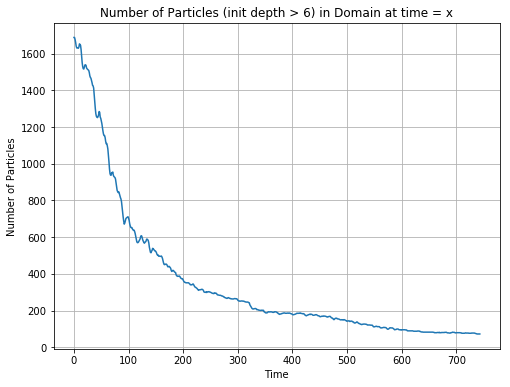

In [58]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
time = range(744)
ax.plot(time, sa)
ax.grid('on')
ax.set_title('Number of Particles (init depth > 6) in Domain at time = x')
ax.set_ylabel('Number of Particles')
ax.set_xlabel('Time')

In [59]:
index_shallow_particles=[]
for n in range(2694):
    if result.variables['init_z'][n] < 6:
        index_shallow_particles.append(n)

In [60]:
len(index_shallow_particles)

1005

In [62]:
mask=lont[:].mask
def shallow_particles(time, index):
    number_of_shallow_particles = np.zeros(time)
    for n in range(time):
        for m in index:
            if (mask[n,m]) == False: 
                y,x = geo_tools.find_closest_model_point(lont[n,m],latt[n,m],lons, lats, land_mask=bathy.mask)
                if (598<y<658) and (118<x<134):
                    number_of_shallow_particles[n] = number_of_shallow_particles[n] + 1
    return number_of_shallow_particles

In [67]:
sb = shallow_particles(744, index_shallow_particles)

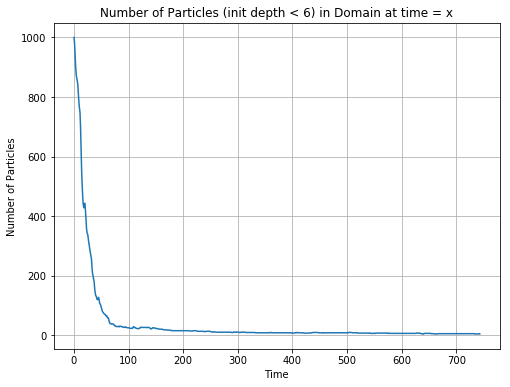

In [69]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
time = range(744)
ax.plot(time, sb)
ax.grid('on')
ax.set_title('Number of Particles (init depth < 6) in Domain at time = x')
ax.set_ylabel('Number of Particles')
ax.set_xlabel('Time')